# Capstone 2: Modeling

## Set Up and Load

In [2]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [3]:
path = 'C:\\Users\\Shru\\Documents\\Datasets\\gene_expression\\data'
os.chdir(path)

In [4]:
os.getcwd()

'C:\\Users\\Shru\\Documents\\Datasets\\gene_expression\\data'

In [5]:
df = pd.read_csv('fullgenedata.csv',index_col=0)
df.head()

,cancer,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
Patient_Num,,,,,,,,,,,,,,,,,,,,,
1,ALL,-214,-153,-58,88,-295,-558,199,-176,252,...,185,511,-125,389,-37,793,329,36,191,-37
2,ALL,-139,-73,-1,283,-264,-400,-330,-168,101,...,169,837,-36,442,-17,782,295,11,76,-14
3,ALL,-76,-49,-307,309,-376,-650,33,-367,206,...,315,1199,33,168,52,1138,777,41,228,-41
4,ALL,-135,-114,265,12,-419,-585,158,-253,49,...,240,835,218,174,-110,627,170,-50,126,-91
5,ALL,-106,-125,-76,168,-230,-284,4,-122,70,...,156,649,57,504,-26,250,314,14,56,-25


## Model

##### Because the data provided was already normalized no additional scaling is necessary. We can split the data into training and test subsets and model.

In [14]:
# Subsetting out data into our dependent and independent variables
X = df.drop(['cancer'],axis=1)
y = df.cancer

# Split the data using sklearn function train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=4)

In [7]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(72, 7129) (72,)
(50, 7129) (50,)
(22, 7129) (22,)


In [15]:
# model
lm = LogisticRegression()
lm.fit(X_train,y_train)
score = lm.score(X_test,y_test)
pred = lm.predict(X_test)
print(score)

0.9545454545454546


In [9]:
df_pred = pd.concat([y_test.reset_index(), pd.Series(pred)],axis=1)
df_pred

,Patient_Num,cancer,0
0,30,AML,AML
1,69,ALL,ALL
2,66,AML,ALL
3,21,ALL,ALL
4,27,ALL,ALL
5,5,ALL,ALL
6,20,ALL,ALL
7,36,AML,AML
8,54,AML,AML
9,52,AML,AML


In [10]:
# Evaluate our model
dic = {'ALL':0, 'AML':1}
y_test1 = y_test.replace(dic)
pred1 = pd.DataFrame(data=pred,index=y_test.index)
pred1 = pred1.replace(dic)
f1 = f1_score(y_test1, pred1)
print(f1)

0.923076923076923


In [11]:
coef = pd.DataFrame(abs(lm.coef_)).T
coef_df = pd.DataFrame(abs(lm.coef_).T, index=X_train.columns, columns=['Coefficient'])
coef_df.sort_values(by='Coefficient',ascending=False).head(15)

,Coefficient
M19507_at,0.000333
M96326_rna1_at,0.000244
M11147_at,0.000236
M27891_at,0.000224
Y00787_s_at,0.000194
M26602_at,0.000182
Z19554_s_at,0.000176
X17042_at,0.000163
M27783_s_at,0.000148
HG2887-HT3031_at,0.000139


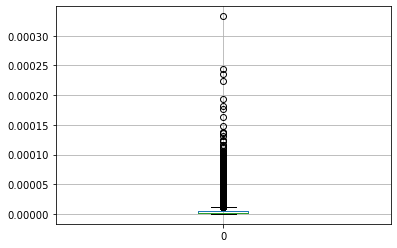

In [12]:
_ = coef.boxplot()

#### Model with stratification split

In [18]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y,test_size=0.3, random_state=4, stratify=y)
lm2 = LogisticRegression()
lm2.fit(X2_train,y2_train)
score2 = lm2.score(X2_test,y2_test)
pred2 = lm2.predict(X2_test)
print(score2)
dic = {'ALL':0, 'AML':1}
y_test2 = y2_test.replace(dic)
pred3 = pd.DataFrame(data=pred2,index=y2_test.index)
pred3 = pred3.replace(dic)
f1 = f1_score(y_test2, pred3)
print(f1)

1.0
1.0


In [17]:
df_pred2 = pd.concat([y2_test.reset_index(), pd.Series(pred2)],axis=1)
df_pred2

,Patient_Num,cancer,0
0,34,AML,AML
1,42,ALL,ALL
2,9,ALL,ALL
3,46,ALL,ALL
4,48,ALL,ALL
5,57,AML,AML
6,72,ALL,ALL
7,1,ALL,ALL
8,63,AML,AML
9,6,ALL,ALL


In [19]:
coef2 = pd.DataFrame(abs(lm2.coef_)).T
coef_df2 = pd.DataFrame(abs(lm2.coef_).T, index=X2_train.columns, columns=['Coefficient'])
coef_df2.sort_values(by='Coefficient',ascending=False).head(15)

,Coefficient
M19507_at,0.000347
M27891_at,0.000296
U05255_s_at,0.000249
M26602_at,0.000216
M91036_rna1_at,0.000208
M25079_s_at,0.000182
M14328_s_at,0.000180
M27783_s_at,0.000177
Y00787_s_at,0.000176
M96326_rna1_at,0.000167
